<a href="https://colab.research.google.com/github/vishal2002begani/machine_learning/blob/main/TSNE_MNIST_dataset_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Here i have impleted TSNE algorithm to visualize the MNISt dataset using plotly express.
# TSNE is a dimensionality reduction algorithm that can be used to reduce the dimensionality of a dataset.
# It is used for complex data analysis and visualization because our PCA algorithm is not suitable for complex data it works only linear data

In [24]:
import pandas as pd
df=pd.read_csv('train.csv')
print(df.shape)
df.head()   #This line displays the first five rows of the DataFrame df.
            # This is useful for quickly inspecting the contents and structure of the DataFrame.

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


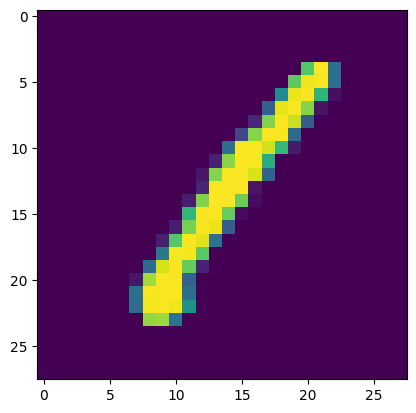

In [25]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[0,1:].values.reshape(28,28))#by the help of iloc we have selected data for our analysis
# 0 means first row and 1:means start from 1st column to end of column means we left 0th column becaue it have labels

In [17]:
from sklearn.manifold import TSNE         #direct transform without preprocess
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df.iloc[:,1:])
z.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42000 samples in 0.100s...
[t-SNE] Computed neighbors for 42000 samples in 124.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities for s

(42000, 2)

In [26]:
print(z)

[[-45.6868   -29.832792]
 [ 82.371284 -12.557659]
 [-98.45682  -12.366022]
 ...
 [-73.01982   41.86435 ]
 [ 65.69204   42.66908 ]
 [-11.987412  65.61684 ]]


In [30]:
# from sklearn.manifold import TSNE
# # Drop rows with NaN values (preprocessing on the data )
# df_clean = df.iloc[:, 1:].dropna()  # Remove rows with any NaN values also we have to remove that label from our dataframe
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# z = tsne.fit_transform(df_clean)
# z.shape

In [31]:
# from sklearn.manifold import TSNE
# from sklearn.impute import SimpleImputer    # Handle NaN values using imputation
# imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of each column we can replace with each row mean
# df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:,1:]))
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# z = tsne.fit_transform(df_imputed) # Use the imputed data
# z.shape

In [33]:
# # Handle NaN values before applying TSNE
# df_filled = df.fillna(0)  # Replace NaN with 0, or use another imputation strategy
# # Apply TSNE
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# z = tsne.fit_transform(df_filled.iloc[:,1:])
# z.shape

In [34]:
df['x'] = z.T[0]
df['y'] = z.T[1]

In [35]:
import plotly.express as px
fig = px.scatter(df, x="x", y="y", color="label")
fig.show()